## Day 30 Lecture 2 Assignment

In this assignment, we will learn about random forests. We will use the google play store dataset loaded below.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

reviews.head()

App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]

In this assignment, you will work more independently. Perform the following steps:
    
1. Select which columns are best suited to predict whether the rating is above 4.5
2. Process the data (including transforming to the correct column type, removing missing values, creating dummy variables, and removing irrelevant variables)
3. Create a random forest model and evaluate
4. Using grid search cross validation, tweak the parameters to produce a better performing model
5. Show and discuss your results

Good luck!

In [3]:
reviews.dropna(inplace=True)

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [5]:
def clean_data(df):
  for col in df:
    try:
      df[col] = df[col].astype(float)
    except:
      df[col] = df[col]

  return df

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [7]:
reviews.drop(columns=['Size', 'Current Ver',	'Android Ver', 'Last Updated', 'App', 'Genres'], inplace=True)

In [8]:
reviews.head()

Category  Rating Reviews     Installs  Type Price Content Rating
0  ART_AND_DESIGN     4.1     159      10,000+  Free     0       Everyone
1  ART_AND_DESIGN     3.9     967     500,000+  Free     0       Everyone
2  ART_AND_DESIGN     4.7   87510   5,000,000+  Free     0       Everyone
3  ART_AND_DESIGN     4.5  215644  50,000,000+  Free     0           Teen
4  ART_AND_DESIGN     4.3     967     100,000+  Free     0       Everyone

In [9]:
reviews['Price'] = reviews['Price'].str.strip('$')
reviews['Price'] = reviews['Price'].astype(float)
reviews['Rating']= np.where((reviews['Rating'] >= 4.5), 1, 0)

In [10]:
reviews = clean_data(reviews)

In [11]:
reviews['Rating'] = pd.to_numeric(reviews['Rating'], errors='coerce', downcast='integer')

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   int8   
 2   Reviews         9360 non-null   float64
 3   Installs        9360 non-null   object 
 4   Type            9360 non-null   object 
 5   Price           9360 non-null   float64
 6   Content Rating  9360 non-null   object 
dtypes: float64(2), int8(1), object(4)
memory usage: 521.0+ KB


In [13]:
"""
def convert_to_dummies(df):
  new_df = []
  for val in df:
    if df[val].dtype == 'O':
      pd.get_dummies(df[val], drop_first=True)
      df.drop(columns=val) 
  new_df = pd.DataFrame(new_df)
  df = pd.concat([df, new_df])

  return df
  """

"\ndef convert_to_dummies(df):\n  new_df = []\n  for val in df:\n    if df[val].dtype == 'O':\n      pd.get_dummies(df[val], drop_first=True)\n      df.drop(columns=val) \n  new_df = pd.DataFrame(new_df)\n  df = pd.concat([df, new_df])\n\n  return df\n  "

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = reviews.drop(columns='Rating', axis=1)
y = reviews['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [15]:
!pip install category_encoders

In [19]:
import category_encoders as ce
encoder = ce.LeaveOneOutEncoder(cols=['Category', 'Type', 'Content Rating', 'Installs'])
encoder.fit(X_train, y_train)
X_train = encoder.transform(X_train)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [43]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': [0.01, 0.1, 1, 10, 20, 50]}

forest = RandomForestClassifier()

forest_grid = GridSearchCV(forest, param_grid = params, cv=5)

In [44]:
forest_grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be an integer, got <class 'float'>.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be an integer, got <class 'float'>.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be an integer, got <class 'float'>.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [45]:
forest_grid.best_params_

{'n_estimators': 20}

In [46]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(forest_grid.best_estimator_[0], out_file=None,
                                feature_names=X_train_cleaned.columns,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [47]:
X_test = encoder.transform(X_test)

y_preds = forest_grid.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_confusion_matrix

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80      1284
           1       0.48      0.14      0.22       588

    accuracy                           0.68      1872
   macro avg       0.59      0.54      0.51      1872
weighted avg       0.63      0.68      0.62      1872



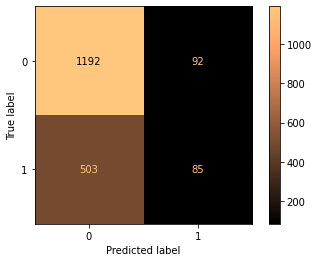

In [49]:
plot_confusion_matrix(forest_grid, X_test, y_test, cmap='copper', values_format='.5g')
plt.show()

In [50]:
train_score = forest_grid.score(X_train, y_train)
test_score = forest_grid.score(X_test, y_test)
print('Train Score: {:.4f}'.format(train_score))
print('Test Score: {:.4f}'.format(test_score))

Train Score: 0.9760
Test Score: 0.6822


In [51]:
probs = forest_grid.predict_proba(X_test)[:, 1:]
fpr, tpr, thresholds = roc_curve(y_test, probs)

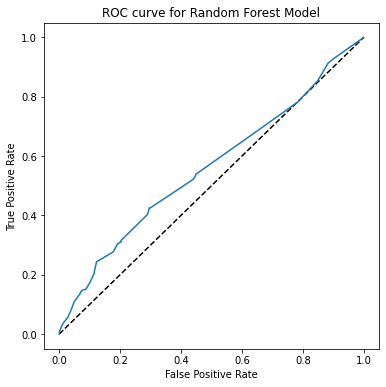

In [52]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest Model')
plt.show()

In [53]:
forest_importance = pd.Series(forest_grid.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)
forest_importance

Reviews           0.634935
Category          0.182255
Installs          0.114706
Content Rating    0.035589
Price             0.028039
Type              0.004477
dtype: float64